In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import (models, transforms)
import os
import utils
from pathlib import Path
import trainer
from torchinfo import summary
import time
import matplotlib.pyplot as plt
import numpy as np
import simplify
import torch.nn.utils.prune as prune

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

/home/p3rzival/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [2]:
vit_default = utils.load_default_model()
loss_fn = nn.CrossEntropyLoss()
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit_transforms = pretrained_vit_weights.transforms()

/home/p3rzival/TFG-Efficient-Vision-Transformer-Inference-on-Edge-Devices/utils.py:166: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vit.load_state_dict(torch.load(model_pa

Linear(in_features=768, out_features=10, bias=True)


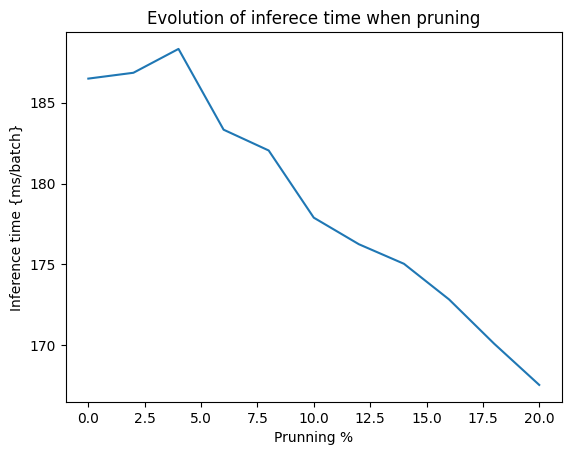

In [ ]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
_, _, val_dl, _ = utils.create_loaders("data", transform=pretrained_vit_transforms, batch_size=32)
amount=0.2
num_times = 100
vit_pruned = utils.prune_vit(vit_default,amount)
metrics = trainer.getMetrics(vit_pruned, val_dl, device, num_times=num_times)

with open("summary/ViT-Pruning/metrics.txt", "a+") as f:
    f.write(f'{amount*100:.2f}% Pruning\n'
            f'Mean total time over {num_times} executions: {np.mean(metrics["Total latency"])} +- {np.std(metrics["Total latency"])} ms/batch \n'
            f'Mean memory time over {num_times} executions: {np.mean(metrics["Memory latency"])} +- {np.std(metrics["Memory latency"])} ms/batch \n'
            f'Mean inference time over {num_times} executions: {np.mean(metrics["Inference Latency"])} +- {np.std(metrics["Inference Latency"])} ms/batch \n'
            f'Mean memory over {num_times} executions: {np.mean(metrics["Memory"])} +- {np.std(metrics["Memory"])} MB\n\n')